In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

In [2]:
train = "Dataset/Train"
test = "Dataset/Test"
valid = "Dataset/Validation"



In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255.0)
test_gen = ImageDataGenerator(
    rescale=1./255.0)
valid_gen = ImageDataGenerator(
    rescale=1./255.0)

In [4]:
train_ds = train_gen.flow_from_directory(
    train,target_size=(224,224),batch_size=512, class_mode='binary')
test_ds = test_gen.flow_from_directory(
    test,target_size=(224,224),batch_size=512, class_mode='binary')
valid_ds = valid_gen.flow_from_directory(
    valid,target_size=(224,224),batch_size=512, class_mode='binary')

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [5]:
def plot_data(ds,batch_num,image_num):
    plt.imshow(ds[batch_num][0][image_num])
    name = np.argmax(ds[batch_num][1][image_num])
    plt.xlabel(list(train_ds.class_indices)[name])

In [38]:
train_ds.class_indices

{'Female': 0, 'Male': 1}

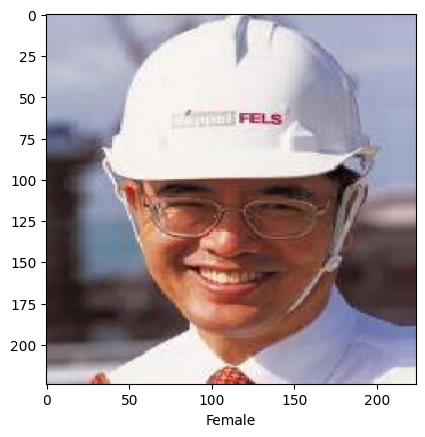

In [6]:
plot_data(train_ds,1,1)

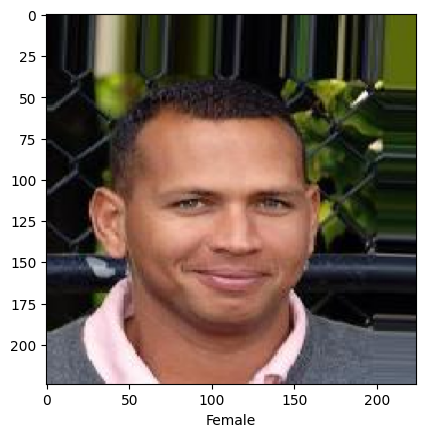

In [7]:
plot_data(test_ds,2,2)

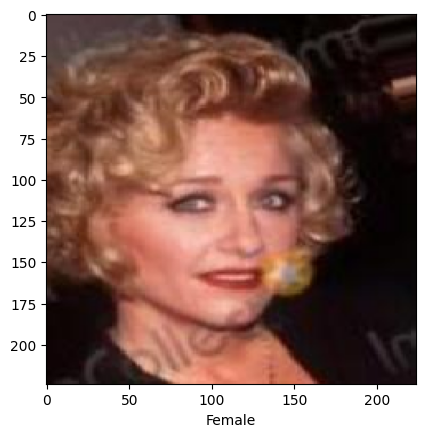

In [8]:
plot_data(valid_ds,2,30)

In [14]:
model = Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=[224,224,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 197136)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               25233536  
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,234,113
Trainable params: 25,234,113
Non-trainable params: 0
__________________________________________

In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [16]:
hasil = model.fit(train_ds,epochs=5,validation_data=valid_ds)

Epoch 1/5
313/313 [==============================] - 2524s 8s/step - loss: 0.7864 - accuracy: 0.8728 - val_loss: 0.1628 - val_accuracy: 0.9380
Epoch 2/5
313/313 [==============================] - 3161s 10s/step - loss: 0.1321 - accuracy: 0.9501 - val_loss: 0.1362 - val_accuracy: 0.9488
Epoch 3/5
313/313 [==============================] - 9357s 30s/step - loss: 0.1041 - accuracy: 0.9606 - val_loss: 0.1191 - val_accuracy: 0.9549
Epoch 4/5
313/313 [==============================] - 2523s 8s/step - loss: 0.0891 - accuracy: 0.9667 - val_loss: 0.1256 - val_accuracy: 0.9543
Epoch 5/5
313/313 [==============================] - 2367s 8s/step - loss: 0.0751 - accuracy: 0.9728 - val_loss: 0.1301 - val_accuracy: 0.9526


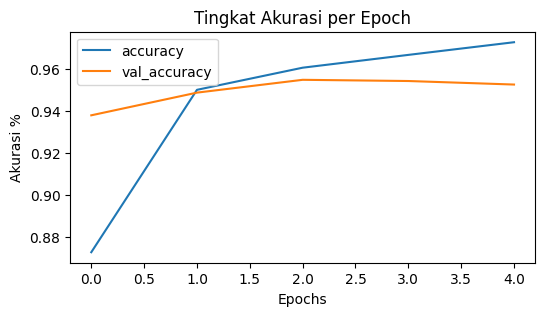

In [18]:
plt.figure(1, figsize=(6,3))
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('Tingkat Akurasi per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Akurasi %')
plt.legend(['accuracy', 'val_accuracy'])

In [19]:
model.evaluate(test_ds)

40/40 [==============================] - 173s 4s/step - loss: 0.1190 - accuracy: 0.9557


[0.11904614418745041, 0.9557021856307983]

In [81]:
#fungsi prediksi

def hasil_gambar(i, prediksi_array, label_asli, img):

    label_asli, img = label_asli[0][i], img[0][i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    label_pred = np.argmax(prediksi_array)
    if label_pred == label_asli:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[label_pred],
                                          100*np.max(prediksi_array),
                                          class_names[label_asli]    
                                        ), color=color)

In [75]:
prediksi = model.predict(test_ds)

40/40 [==============================] - 216s 5s/step
